In [1]:
import pandas as pd
train_dir='xray_dataset_covid19/train'
test_dir='xray_dataset_covid19/test'

In [2]:
import os
classes_train = os.listdir(train_dir)
classes_test = os.listdir(test_dir)
print(classes_train)
print(classes_test)

['COVID', 'NORMAL']
['COVID', 'NORMAL']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

c:\Users\91828\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


Found 387 images belonging to 2 classes.


In [4]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 100 images belonging to 2 classes.


In [5]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

model=Sequential() 


model.add(Conv2D(32,(5,5),activation='relu',input_shape=(1000,1000,3)))
# 16 is the number of filters, (3,3) it the filter size,acitivation is the activation function and input_shape is the size of the image 
model.add(MaxPooling2D(5,5))
#(2,2) is the pool size 

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Conv2D(128,(5,5),activation='relu'))
model.add(MaxPooling2D(5,5))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
# 128 is the number of the hideen layers
#model.add(Dropout(0.5))
# Dropout is a function that reducess over fiting by removing random layers every epoch

model.add(Dense(1,activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [8]:
callbacks = [earlystop, learning_rate_reduction]

In [9]:
model.fit(
    train_generator, 
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
13/13 [==============================] - 660s 50s/step - loss: 0.6367 - accuracy: 0.6460 - val_loss: 0.6345 - val_accuracy: 0.5300 - lr: 0.0010
Epoch 2/10
13/13 [==============================] - 573s 43s/step - loss: 0.4795 - accuracy: 0.8010 - val_loss: 0.2536 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 3/10
13/13 [==============================] - 607s 46s/step - loss: 0.3618 - accuracy: 0.8579 - val_loss: 0.1110 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 4/10
13/13 [==============================] - 652s 50s/step - loss: 0.3167 - accuracy: 0.8708 - val_loss: 0.2423 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 5/10
13/13 [==============================] - 619s 47s/step - loss: 0.3515 - accuracy: 0.8682 - val_loss: 0.2129 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/10
13/13 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8708 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
13/13 [==============================] - 509s 39s/step

In [10]:
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy,lr
0,0.636707,0.645995,0.634454,0.53,0.0010
1,0.479540,0.801034,0.253592,0.94,0.0010
2,0.361763,0.857881,0.111005,0.98,0.0010
3,0.316740,0.870801,0.242345,0.87,0.0010
4,0.351474,0.868217,0.212859,0.90,0.0010
5,0.308045,0.870801,0.181351,0.96,0.0010
6,0.260506,0.888889,0.092038,0.98,0.0005
7,0.245296,0.906977,0.069499,0.99,0.0005
8,0.203087,0.937984,0.057783,0.99,0.0005
9,0.211956,0.909561,0.037529,0.99,0.0005


<AxesSubplot:>

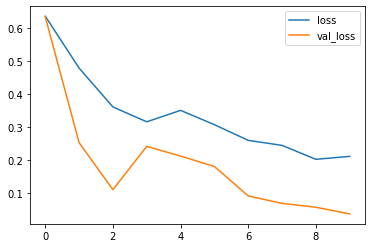

In [11]:
history[['loss','val_loss']].plot()

<AxesSubplot:>

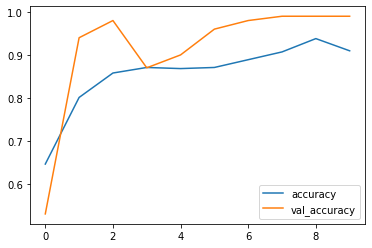

In [12]:
history[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

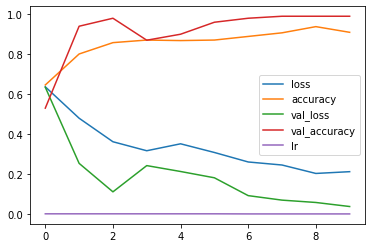

In [13]:
history.plot()

In [14]:
model.evaluate(test_generator)

4/4 [==============================] - 10s 2s/step - loss: 0.0375 - accuracy: 0.9900


[0.03752943128347397, 0.9900000095367432]

In [15]:
model_pred=model.predict(test_generator)

4/4 [==============================] - 10s 2s/step


In [16]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
class_names=['NORMAL','COVID']

In [20]:
import matplotlib.pyplot as plt
import numpy as np
def plot_prediction(test_generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    images, labels = test_generator.next()
    predictions = np.argmax(model.predict(images), axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break

    plt.show()

1/1 [==============================] - 5s 5s/step


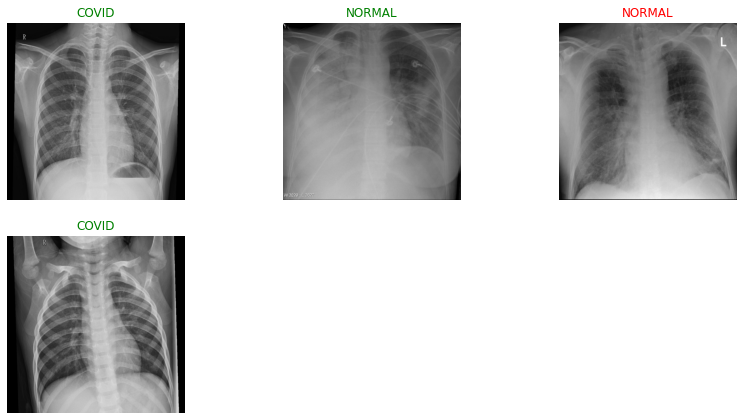

In [21]:
plot_prediction(test_generator,5)